# Week 4 - Probability

This is a Jupyter notebook to explore the material in (Ross, 2017, Chp. 4) with the use of Python. 

In [118]:
%matplotlib inline
# from now on we'll start each notebook with the library imports
# and special commands to keep these things in one place (which
# is good practice). The line above is jupyter command to get 
# matplotlib to plot inline (between cells)
# Next we import the libraries and give them short names
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from collections import Counter

## Sets in Python

Python provides a class called <code>set</code> which allows you to perform set operations. Let's see some examples then we can solve some of the problems from the text book.

In [119]:
# From (Ross, 2017, p. 144, Q7)

# it is convention to use lower case for python variables but
# at times it will be clearer to match the notation from elsewhere.
# Here we use upper case letters to refer to the sets that are 
# defined in the textbook.
# we can define sets in one of two ways,
# using curly braces or using the set constructor
S = set(range(1,7)) # set constructor passing a generator
A = set([1,3,5]) # set constructor passing a list
B = {4,6} # curly braces
C = {1,4}
print(f"S = {S}")
print(f"A = {A}")
print(f"B = {B}")
print(f"C = {C}")
print()

S = {1, 2, 3, 4, 5, 6}
A = {1, 3, 5}
B = {4, 6}
C = {1, 4}



In [120]:
# The size of a set can be displayed with the len function
print(f"|S| = {len(S)}")
print()

|S| = 6



In [121]:
# elements can be added with add and removed with remove
print("Adding element 11")
S.add(11)
print(f"Now, |S| = {len(S)}")
print(f"S = {S}")
print("Removing element 11")
S.remove(11)
print(f"Now, |S| = {len(S)}")
print(f"S = {S}")
# adding an existing element does nothing as set's ignore duplicates
print("Adding element 4")
S.add(4)
print(f"Now, |S| = {len(S)}")
print(f"S = {S}")
print()

Adding element 11
Now, |S| = 7
S = {1, 2, 3, 4, 5, 6, 11}
Removing element 11
Now, |S| = 6
S = {1, 2, 3, 4, 5, 6}
Adding element 4
Now, |S| = 6
S = {1, 2, 3, 4, 5, 6}



In [122]:
# the presence of an element can be tested for with 'in'
print(f"Is 3 in A? {3 in A}")
print(f"Is 3 in B? {3 in B}")
# and you can use this for control flow
if 11 in S:
    print("11 is still in S. Something must be wrong.")
else:
    print("11 is no longer in S. It has been removed as expected.")
print()

Is 3 in A? True
Is 3 in B? False
11 is no longer in S. It has been removed as expected.



In [123]:
# Note that the empty set must be created using the 
# set constructor
emptyset = set()
# if you use curly braces you get a dictionary
emptydict = {}
print(f"type of emptyset is {type(emptyset)}")
print(f"type of emptydict is {type(emptydict)}")

type of emptyset is <class 'set'>
type of emptydict is <class 'dict'>


<code>set</code> also come with their own functions to perform set operations. For convenience, (Ross, 2017, p. 144, Q7) is repeated below, alongside Python code using the <code>set</code> operation functions.

**Question 7 (a)** what is $A \cap B$?

**Question 7 (b)** - what is $B \cup C$?

**Question 7 (c)** - what is $A \cup (B \cap C)$?
(Note that operations within paratheses are performed first (just like in numerical arithmetic.)

**Question 7 (d)** - what is $(A \cup B)^c$

In [124]:
# 7(a)
result = A.intersection(B)
print(f"7 (a) A ∩ B = {result}")
# this is the empty set, note that python prints "set()"

# 7(b)
result = B.union(C)
print(f"7 (b) B ∪ C = {result}")

# 7 (c)
result = A.union(B.intersection(C))
print(f"7 (c) A ∪ (B ∩ C) = {result}")

# 7(d)
result = S.difference(A.union(B))
print(f"7 (d) complement of (A ∪ B) = {result}")

7 (a) A ∩ B = set()
7 (b) B ∪ C = {1, 4, 6}
7 (c) A ∪ (B ∩ C) = {1, 3, 4, 5}
7 (d) complement of (A ∪ B) = {2}


## Exercise A - Events as Sets

Consider the two dice example from the slides. Implement the following in Python.

1. create the sample space $S$ as a <code>set</code>. This should consist of all outcomes of rolling two dice as pairs (2-tuples) <code>(i,j)</code>, where $i$ is the outcome of the green dice and $j$ is the outcome of the yellow dice. If you can, try using a list-comprehension, but if you aren't sure how to do this, use simple for-loops instead. Print the constituent outcomes and size of the sample space.
1. create event $A$ (outcomes where green die shows $3$) and event $B$ (outcomes where the values sum to $8$) as <code>set</code>s. Print the constituent outcomes and size  of these events. 
1. Print the constituent outcomes and sizes of $A \cup B$ and $A \cap B$.
1. imagine a new event $C$ which is that the product of the two face values equals $6$. For instance, $(1,6) \in C$ ($\in$ means is-in) because $1 \cdot 6 = 6$. However, $(2,5) \not\in C$ ($\not\in$ means is-not-in) because $2\cdot 5 = 10 \neq 6$. Can you predict the outcomes in $C$, $A \cup C$, $B \cap C^c$ and $A \cap B \cap C$? Use python to test your predictions.
1. Now create a new sample space <code>S_3</code> with outcomes $(i,j,k)$ which are the faces on three rolled dice (green $i$, yellow $j$ and purple $k$). Create: event <code>A_3</code> which contains outcomes where the yellow dice shows a $5$; event <code>B_3</code> which contains outcomes where all dice sum to $11$; and event <code>C_2</code> which contains outcomes where at least two dice show the same face value. Print the sizes of the sample space and each event. Can you predict which outcomes are in $A_3 \cap B_3 \cap C_3$.

In [125]:
## to complete

print("Exercise A.1")
S = set([(i,j) for i in range(1,7) for j in range(1, 7)])
# This creates a list before passing it to the 'set' constructor
# but we could drop the square brackets for more efficient code.
S = set((i,j) for i in range(1,7) for j in range(1, 7))
print(f"|S| = {len(S)}")
print(f"S = {S}")
print()

print("Exercise A.2")
A = set( (i,j) for i,j in S if i == 3)
print(f"|A| = {len(A)}")
print(f"A = {A}")
B = set((i,j) for i,j in S if (i+j) == 8)
print(f"|B| = {len(B)}")
print(f"B = {B}")
print()

print("Exercise A.3")
A_union_B = A.union(B)
A_intersection_B = A.intersection(B)
print(f"|A ∪ B| = {len(A_union_B)}")
print(f"A ∪ B = {A_union_B}")
print(f"|A ∩ B| = {len(A_intersection_B)}")
print(f"A ∩ B = {A_intersection_B}")
print()

print("Exercise A.4")
C = set((i,j) for i,j in S if (i*j) == 6)
print(f"|C| = {len(C)}")
print(f"C = {C}")
A_union_C = A.union(C)
B_intersection_compC = B.intersection(S.difference(C))
A_intersection_B_intersection_C = A.intersection(B.intersection(C))
# A shares one outcome with C
print(f"|A ∪ C| = {len(A_union_C)}")
print(f"A ∪ C = {A_union_C}")
# B shares no outcomes with C, therefore
# B ∩ comp(C) is simply B
print(f"|B ∩ comp(C)| = {len(B_intersection_compC)}")
print(f"B ∩ comp(C) = {B_intersection_compC}")
# as B and C share no outcomes A ∩ B ∩ C is empty
print(f"|A ∩ B ∩ C| = {len(A_intersection_B_intersection_C)}")
print(f"A ∩ B ∩ C = {A_intersection_B_intersection_C}")
print()

print("Exercise A.5")
S_3 = set((i,j,k) for i in range(1,7) for j in range(1,7) for k in range(1,7)) 
print(f"|S_3| = {len(S_3)}")
A_3 = set((i,j,k) for i,j,k in S_3 if j==5)
B_3 = set((i,j,k) for i,j,k in S_3 if (i+j+k) == 11)
C_3 = set((i,j,k) for i,j,k in S_3 if (i==j) or (j==k) or (k==i))
print(f"|A_3| = {len(A_3)}")
print(f"|B_3| = {len(B_3)}")
print(f"|C_3| = {len(C_3)}")
print(f"A_3 ∩ B_3 ∩ C_3 = {A_3.intersection(B_3.intersection(C_3))}")
print()


Exercise A.1
|S| = 36
S = {(1, 3), (6, 6), (5, 6), (2, 1), (6, 2), (1, 6), (5, 1), (2, 5), (1, 2), (3, 3), (5, 5), (4, 4), (6, 3), (1, 5), (3, 6), (2, 2), (4, 1), (1, 1), (6, 4), (3, 2), (2, 6), (5, 4), (4, 5), (5, 2), (1, 4), (2, 3), (4, 2), (6, 5), (3, 5), (5, 3), (4, 6), (6, 1), (3, 1), (4, 3), (3, 4), (2, 4)}

Exercise A.2
|A| = 6
A = {(3, 2), (3, 3), (3, 1), (3, 6), (3, 4), (3, 5)}
|B| = 5
B = {(3, 5), (2, 6), (4, 4), (6, 2), (5, 3)}

Exercise A.3
|A ∪ B| = 10
A ∪ B = {(3, 2), (2, 6), (3, 3), (3, 1), (4, 4), (6, 2), (3, 6), (5, 3), (3, 4), (3, 5)}
|A ∩ B| = 1
A ∩ B = {(3, 5)}

Exercise A.4
|C| = 4
C = {(3, 2), (1, 6), (6, 1), (2, 3)}
|A ∪ C| = 9
A ∪ C = {(3, 2), (3, 3), (6, 1), (3, 1), (1, 6), (2, 3), (3, 6), (3, 4), (3, 5)}
|B ∩ comp(C)| = 5
B ∩ comp(C) = {(3, 5), (2, 6), (4, 4), (6, 2), (5, 3)}
|A ∩ B ∩ C| = 0
A ∩ B ∩ C = set()

Exercise A.5
|S_3| = 216
|A_3| = 36
|B_3| = 27
|C_3| = 96
A_3 ∩ B_3 ∩ C_3 = {(3, 5, 3), (5, 5, 1), (1, 5, 5)}



## Exercise B 
Complete the following questions 1 and 2 from (Ross, 2017, Sec. 4.2) (you can find these on page 143). The text is repeated here for convenience:

> 1 - A box contains three balls—one red, one blue, and one yellow. Consider
an experiment that consists of withdrawing a ball from the box, replacing
it, and withdrawing a second ball.
> 
> (a) What is the sample space of this experiment?
> 
> (b) What is the event that the first ball drawn is yellow?
> 
> (c) What is the event that the same ball is drawn twice?


> 2 - Repeat Prob. 1 when the second ball is drawn without replacement of the first ball.

*to complete - try to format your answers. You can look up markdown syntax [here](https://paperhive.org/help/markdown).*

> 1 - A box contains three balls—one red, one blue, and one yellow. Consider an experiment that consists of withdrawing a ball from the box, replacing it, and withdrawing a second ball.
> 
> (a) What is the sample space of this experiment?

The sample space consists of all triples $(i,j,k)$ where $i$, $j$ and $k$ can take any values r(ed), b(lue) or y(ellow). These are:

$$S = \{(r, r, r), (r, r, b), (r, r, y), (r, b, r), (r, b, b), (r, b, y), (r, y, r), (r, y, b), (r, y, y), (b, r, r), (b, r, b), (b, r, y), (b, b, r), (b, b, b), (b, b, y), (b, y, r), (b, y, b), (b, y, y), (y, r, r), (y, r, b), (y, r, y), (y, b, r), (y, b, b), (y, b, y), (y, y, r), (y, y, b), (y, y, y)\}$$

I was able to generate this set readily with the following two lines of python code:

    colours = ['r','b','y']
    S = set((i,j,k) 
            for i in colours for j in colours for k in colours)

> (b) What is the event that the first ball drawn is yellow?

The event that the first ball drawn is yellow is the set of all outcomes $('y',j,k)$ for any $j$ and $k$. If we call this event A we can write:

$$A = \{(y, r, r), (y, r, b), (y, r, y), (y, b, r), (y, b, b), (y, b, y), (y, y, r), (y, y, b), (y, y, y)\}$$

I was able to generate this set readily with the additional line of python code:

    A = set((i,j,k) for (i,j,k) in S if i == 'y')

> (c) What is the event that the same ball is drawn twice?

Let's call this event $B$. This is any outcome $(i,j,k)$ such that one of the following are true $i=j$ or $i=k$ or $j=k$ (this is an inclusive or so it also allows $i=j=k$). Therefore the event is the set of valid outcomes and is given by:

$$B = \{(r, r, r), (r, r, b), (r, r, y), (r, b, r), (r, b, b), (r, y, r), (r, y, y), (b, r, r), (b, r, b), (b, b, r), (b, b, b), (b, b, y), (b, y, b), (b, y, y), (y, r, r), (y, r, y), (y, b, b), (y, b, y), (y, y, r), (y, y, b), (y, y, y)\}$$

I was able to generate this set readily with the additional line of python code:

    B = set((i,j,k)
            for (i,j,k) in S if (i==j) or (i==k) or (j==k) )

> 2 - Repeat Prob. 1 when the second ball is drawn without replacement of the first ball.

> (a) What is the sample space of this experiment?

The sample space consists of all triples $(i,j,k)$ where $i$, $j$ and $k$ can take values r(ed), b(lue) or y(ellow) and such that no two values are the same, e.g. $i \neq j$, $i \neq k$ and $j \neq k$ (because once the single ball of a give colour is removed there is no possibility of choosing that colour in a later draw). This gives a much smaller sample space than before:

$$S = \{(y, r, b), (b, y, r), (r, b, y), (b, r, y), (y, b, r), (r, y, b)\}$$

I was able to generate this set readily with the following two lines of python code:

    colours = ['r','b','y']
    S = set((i,j,k) 
            for i in colours for j in colours for k in colours
               if (i!=j) and (i!=k) and (j!=k))

> (b) What is the event that the first ball drawn is yellow?

The event that the first ball drawn is yellow is the set of all outcomes $(i,j,k) \in S$ (in the sample space), where $i=$`'y'`. If we call this event A we can write:

$$A = \{(y, r, b), (y, b, r)\}$$

I was able to generate this set readily with the same line of code I used for problem 1. It is enough that the sample space is different. The code was:

    A = set((i,j,k) for (i,j,k) in S if i == 'y')

> (c) What is the event that the same ball is drawn twice?

We again call this event $B$. This is any outcome $(i,j,k) \in S$ (in S) such that one of the following are true $i=j$ or $i=k$ or $j=k$. By inspection it should be possible to see that this is inconsistent with our sample space (which does not allow repeats) and so we can say that event B is the empty set:

$$B = \emptyset$$

You can also check your answer using the code from problem 1.

## Properties of Probability

In (Ross, 2017, Sec. 4.3) it says:

> It is an empirical fact that if an experiment is continually repeated under the
> same conditions, then, for any event A, the proportion of times that the out-
> come is contained in A approaches some value as the number of repetitions
> increases. For example, if a coin is continually flipped, then the proportion of
> flips landing on tails will approach some value as the number of flips increases.
> It is this long-run proportion, or relative frequency, that we often have in mind
> when we speak of the probability of an event.

What does this really mean? What is an "empirical fact"? Some people don't like this terminology but the essential argument being made is related to something called the "Law of Large numbers". More specifically "The Weak Law of Large Numbers". There is a more detailed description [here](), but the highlight is this:

> ## The Law of Large Numbers
> 
> The chance that the fraction of successes in n independent trials with probability $p$ of success is close to $p$ approaches 1 (or 100\%) as $n$ grows.
> 
> More precisely, as $n$ increases, for every number $e > 0$,
> 
> $P( | \text{fraction of successes in n trials} − p | < e ) \text{ approaches } 1$.

In the simplest case, we assume that $p$ is a known fixed number. The fraction of successes could be thought of as us having $S=\{\text{success}, \text{failure}\}$. Although this can be thought of as any event, $A \subset S$, where if the outcome is in $A$ then we have a success, and if not then we have a failure. Moreover we know the probability of success $P(A) = p$.

The fraction of successes after $n$ trials is a random number and can take any value between 0 and 1. However, the above states that for any positive number, e, no matter how small, there is a probability that the fraction of successes is within $e$ of the true probability $p$ (i.e. it is in the range $[p-e,p+e]$). Further, that probability gets closer and closer to 1 as $n$ gets larger. 

Let us simulate a number of trials of such an experiment and look at the fraction of successes after $n$ such trials (for different values of $n$) and compare this with the known probability $p$. For this, we use <code>numpy.random.binomial</code>. We'll generate an outcome for a maximum number of trials $N$ and then look at different values of $0< n \leq N$ and plot the result. 

Text(0,0.5,'Fraction of successes')

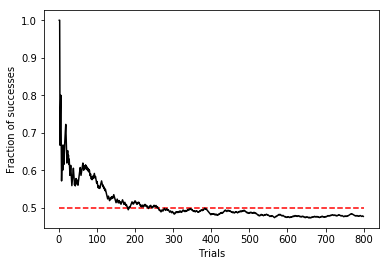

In [126]:
N = 800 # max number of trials
p = 0.5 # known probability of success
# There are a number of ways of doing this, but for clarity
# we'll sample N numbers uniformly between 0 and 1 then check whether
# each is less than p. This gives us a boolean vector, but it is easier
# to work with integers so we then convert to integer, True->1 and False->0
outcomes = (np.random.uniform(0, 1, size=N) < p).astype(int)

# Next for any given n we want to calculate the fraction of successes
# in the first n elements of outcomes. To do this, we write a helper function.
def fraction_of_successes(outcomes, n):
    """
    Calculates the fraction of successes in the first n values
    of outcomes.

    Parameters:
    -----------
    outcomes : 1d numpy array
        sequence of observations/outcomes from S={0,1}
    n : int
        number between 1 and len(outcomes)
        
    Returns:
    --------
    fos : number
        fraction of successes
    """
    return np.sum(outcomes[:n])/n
    
# We now calculate the fraction of successes for n trials for 1 <= n <= N
ns = range(1,outcomes.size)
foses = np.array([fraction_of_successes(outcomes, n) for n in ns])

plt.figure()
# plot the constant target line
plt.plot((1,N),(p,p),'r--')
# plot the fraction of successes after
plt.plot(ns,foses,'k-')
plt.xlabel("Trials")
plt.ylabel("Fraction of successes")


If you re-run the above code then you will see different plots. Sometimes the black line will start above p and sometimes below p, but it should typically approach the red dotted line at p after a large number of trials.

## Exercise C - Closeness to $p$
Let us choose a value $e$ and draw the bounds $p-e$ and $p+e$ on the same plot. The Law of large numbers says that for large enough $n$, the value of the black line will eventually "almost certainly" lie between these green boundary lines. Draw an extra wide plot and use $N=2000$ to see this more clearly

Text(0,0.5,'Fraction of successes')

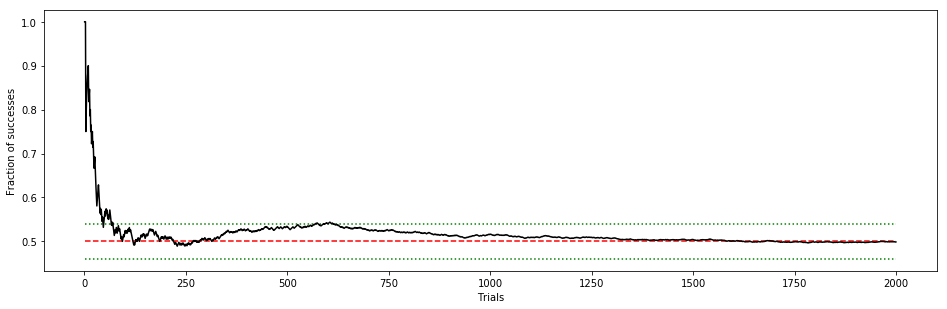

In [127]:
N = 2000 # max number of trials
p = 0.5 # known probability of success
e = 0.04 # arbitrary positive number
# this gives an extra wide figure
plt.figure(figsize=(16,4.8))

## to complete
## recompute the outcomes (this time for N=2000)
## then calculate the fraction of successes and finally
## plot the required graph.
outcomes = (np.random.uniform(0, 1, size=N) < p).astype(int)
ns = range(1,outcomes.size)
foses = np.array([fraction_of_successes(outcomes, n) for n in ns])
# plot the constant target line
plt.plot((1,N),(p,p),'r--')
# plot the boundary lines
plt.plot((1,N),(p+e,p+e),'g:')
plt.plot((1,N),(p-e,p-e),'g:')
# plot the fraction of successes after n trials for each n
plt.plot(ns,foses,'k-')
plt.xlabel("Trials")
plt.ylabel("Fraction of successes")
# Again you can replot this multiple times.


## Exercise D

Complete question 8 from (Ross, 2017, Sec. 4.3). The text is repeated here for convenience:

> 8 - The Japanese automobile company Lexus has established a reputation for quality control. Recent statistics indicate that a newly purchased Lexus ES 350 will have:
> 
> | #defects  | probability |
> |-----------|:-----------:|
> | 0 defects | 0.12 |
> | 1 defect  | 0.18 |
> | 2 defects | 0.25 |
> | 3 defects | 0.20 |
> | 4 defects | 0.15 |
> | 5 or more | 0.10 |
>
> If you purchase a new Lexus ES 350, find the probability that it will have 
>
> (a) 2 or fewer defects
>
> (b) 4 or more defects
>
> (c) Between (inclusive) 1 and 3 defects
>
> Let p denote the probability it will have an even number of defects. Whereas the information given above does not enable us to specify the value of p, find the
>
> (d) Largest
>
> (e) Smallest
>
> value of p which is consistent with the preceding.

Write your answers in the markdown block below.

*to complete - try to format the answers appropriately. You can look up markdown syntax [here](https://paperhive.org/help/markdown)*

> If you purchase a new Lexus ES 350, find the probability that it will have 
>
> (a) 2 or fewer defects

This can be one of the three events that: there are $0$ defects, that there is $1$ defect or that there are $2$ defects. These events are mutually exclusive, and so we can simply add their probabilities:

$$P(\text{2 or fewer defects}) = 0.12 + 0.18 + 0.25 = 0.55$$

> (b) 4 or more defects

Again we can sum the probabilities of mutually exclusive events:

$$P(\text{4 or more defects}) = 0.15 + 0.10 = 0.25$$

> (c) Between (inclusive) 1 and 3 defects

Yet again we can sum the probabilities of mutually exclusive events:

$$P(\text{between 1 and 3 defects}) = 0.18 + 0.25 + 0.20 = 0.63$$

> Let p denote the probability it will have an even number of defects. Whereas the information given above does not enable us to specify the value of p, find the
>
> (d) Largest
>
> (e) Smallest
>
> value of p which is consistent with the preceding.

It is no longer possible to add probabilities of mutually exclusive events as the event that there are "5 or more defects" (say event A) overlaps with the event that there is an even number of defects (say event B). In other words $A \cap B \neq \emptyset$ (there may be 6 defects which is both even and more than 5). Also, we cannot say that event A is entirely within event B. Put another way, $A \cap B^c \neq \emptyset$ (there may be 5 defects, which is odd and greater than or equal to 5). 

The largest value for probability $p = P(\text{even number of defects})$ would be if all outcomes with 5 or more defects were in fact even. As such we can say:

$$
\begin{aligned}
p
& \leq P(0 \text{ defects}) + P(2 \text{ defects})+ P(4 \text{ defects})+ P(5 \text{ or more defects}) \\
&= 0.12 + 0.25 + 0.15 + 0.1 = 0.62
\end{aligned}
$$

Similarly, if all outcomes with 5 or more defects had an odd number of defects then this would lead to the lowest possible value for p, and so,

$$
\begin{aligned}
p
&\geq P(0 \text{ defects}) + P(2 \text{ defects})+ P(4 \text{ defects}) \\
& = 0.12 + 0.25 + 0.15 = 0.52
\end{aligned}
$$





## Exercise E - 2  dice probabilities

Look back at the 2 dice experiment from the slides (and above in Exercise A). Writing in markdown (not in <code>Python</code>) answer the following questions. Imagine that the outcomes $(i,j)$ each have equal probability. What are the following equal to?

1. $P(A)$
1. $P(B)$
1. $P(A \cup B)$
1. $P(A \cap B)$
1. $P(A^c)$
1. $P((A \cap B)^c)$
1. $o(A \cap B)$ -- the odds of $A\cap B$

Finally, look at (Ross, 2017, Sec. 4.4, Q12) on page 158. This also relates to probabilities of 2 dice. Complete that too.

*to complete - try to format the answers as I have done. You can look up markdown syntax [here](https://paperhive.org/help/markdown) and the syntax for LateX formulae [here](https://en.wikibooks.org/wiki/LaTeX/Mathematics) (you can ignore the beginning and just look at the sections on: Greek Letters, Operators, Powers and Indices, Fractions and Binomials).*


1. $P(A) = \frac{6}{36}= \frac{1}{6}$
1. $P(B) = \frac{5}{36}$
1. $P(A \cup B) = \frac{10}{36} = \frac{5}{18}$
1. $P(A \cap B) = \frac{1}{36}$
1. $P(A^c) = \frac{1}{6}$
1. $P((A \cap B)^c) = \frac{35}{36}$ -- every outcome except $(3,5)$
1. $o(A \cap B) = \frac{P(A\cap B)}{P((A\cap B)^c)} =  \frac{1}{36} \cdot \frac{36}{35} = \frac{1}{35}$

For (Ross, 2017, Sec. 4.4, Q12):

12 (a) Call the event that dice sum to 7 or 11 event D. Then:
  * $D = \{(1,6), (2,5), (3,4), (4,3), (5,2),(6,1), (5,6), (6,5)\}$
  * and $|D| = 8$
  * and $P(D) = \frac{8}{36} = \frac{2}{9}$.

12 (b) Call the event that dice sum to 2, 3 or 12 event E. Then:
  * $E =  \{(1,1), (1,2), (2,1), (6,6)\}$ 
  * and $|D| = 8$
  * and $P(E) = \frac{4}{36} = \frac{1}{9}$
  
12 (b) Call the event that dice sum to an even number event F. Then:
  * $F =  \{(i,j)| \text{ both i and j even or both i and j odd} \} $ 
  * and $|F| = |F^c| = 18$. Whatever value $i$ takes there will be three values that $j$ can take that makes the sum odd, and three values that will make the sum even. Therefore, there will be as many odd outcomes as there are even.
  * and $P(F) = \frac{18}{36} = \frac{1}{2}$


## Exercise F - Conditional Probabilities

Complete questions 5 & 6 from (Ross, 2017, Sec. 4.5). The following information is repeated for convenience:

> [T]he following table\ldots describes the age distribution of residents in a northern California county.
>
> | Age        | Number  |
> | :--------- |:-------:|
> | 0-9        | 4200    |
> | 10-19      | 5100    |
> | 20-29      | 6200    |
> | 30-39      | 4400    |
> | 40-49      | 3600    |
> | 50-59      | 2500    |
> | 60-69      | 1800    |
> | Over 70    | 1100    |


*to complete - try to format the answers appropriately*

> 5. If a resident is randomly selected from this county, determine the probability that the resident is:

> (a) Less than 10 years old

The total number of people in this county is:

$$4200+5100+6200+4400+3600+2500+1800+1100 = 28900$$

Of these $4200$ are less than 10 years old. If we randomly selected a person from the county, then all people inthe county would be the sample space $S$ and the event $E_{0-10}$ would be that the person was less than $10$.

Given this information $|S| = 28900$ and $|E_{0-10}| = 4200$ and so:

$$P(E_{0-10}) = \frac{|E_{0-10}|}{|S|} = \frac{4200}{28900} = \frac{42}{289}$$

> (b) Between 10 and 20 years old

By a similar argument, we define event $E_{10-20}$ as all outcomes where the person selected is between 10 and 20 years old, and:

$$P(E_{10-20}) = \frac{|E_{10-20}|}{|S|} = \frac{5100}{28900} = \frac{3}{17}$$


> (c) Between 20 and 30 years old

Again by a similar argument, we define event $E_{20-30}$ as all outcomes where the person selected is between 20 and 30 years old, and:

$$P(E_{20-30}) = \frac{|E_{20-30}|}{|S|} = \frac{6200}{28900} = \frac{62}{289}$$

> (d) Between 30 and 40 years old

Again by a similar argument, we define event $E_{30-40}$ as all outcomes where the person selected is between 30 and 40 years old, and:

$$P(E_{30-40}) = \frac{|E_{30-40}|}{|S|} = \frac{4400}{28900} = \frac{44}{289}$$

> 6. Find the conditional probability that a randomly chosen resident is

> (a) Between 10 and 20 years old, given that the resident is less than 30 years old

Continuing with our notation, we define for any $i$ and $j$ the event $E_{i-j}$ as that in which the sampled person is between $i$ and $j$ years of age.

This question is concerned with two such events $E_{0-30}$ (that the sample person is less than 30) and $E_{10-20}$ (that the sampled person is between $10$ and $20$. The question is asking for the conditional probability:

$$P(E_{10-20}|E_{0-30}) = \frac{|E_{10-20} \cap E_{0-30}|}{|E_{0-30}|} = \frac{|E_{10-20}|}{|E_{0-30}|} = \frac{5100}{4200+5100+6200} = \frac{51}{155}$$

Note that $E_{10-20} \cap E_{0-30} = E_{10-20}$ as $E_{10-20}$ is fully contained within $E_{0-30}$.

> (b) Between 30 and 40 years old, given that the resident is older than 30

Define event $E_{30-}$ as that the sampled person is over 30. Then this question is asking for the conditional probability:

$$P(E_{30-40}|E_{30-}) = \frac{|E_{30-40} \cap E_{30-}|}{|E_{30-}|} = \frac{|E_{30-40}|}{|E_{30-}|} = \frac{4400}{4400+3600+2500+1800+1100} = \frac{22}{67}$$



## Exercise G - Telephone Calls

Complete question 31 from (Ross, 2017, Sec. 4.5). The text is repeated for convenience:

> Suppose that the probability of getting a busy signal when you call a friend is 0.1. Would it be reasonable to suppose that the probability of getting successive busy signals when you call two friends, one right after the other, is 0.01?

>If not, can you think of a condition under which this
would be a reasonable supposition?


*to complete*

>  Would it be reasonable to suppose that the probability of getting successive busy signals when you call two friends, one right after the other, is 0.01?

When would this be the case? Let's assume that your experiment is the calling of two friends one after another. Event $A$ is that the first friend is busy. Event B is that the second friend is busy. The probability that they will both be busy is therefore:

$$P(A\cap B) = P(A)P(B|A) = 0.1 P(B|A)$$

We can interpret the question as saying that $P(A) = P(B) = 0.1$ The second equality comes from the probability $P(A) = 0.1$. The question then asks when the above would be equal to $0.01$. This gives:

$$0.1 P(B|A) = 0.01 \implies P(B|A) = 0.1 = P(B)$$

And so this would require independence between the two events $A$ and $B$. Is this a reasonable assumption?

Well, there is a possibility that the friends are calling one another, and in which case it would not be independent because the cause of the first friend's busy-signal is the same as the cause of the second's.

>If not, can you think of a condition under which this
would be a reasonable supposition?

Given the above, it is now straight-forward to say that if the two friends knew one another then independence between $A$ and $B$ may not be there, and so...

If the two friends do not know one another then it may be reasonable to assume that the two events are independent, but not if they do.

This may not be the whole answer though. There may be times of the day (or week etc) on which any person is more (or less) likely to be busy, and under these circumstances the two events would not be independent even if the friends didn't know one another.

## Exercise H - Bayes Theorem

Complete questions 2 and 3 from (Ross, 2017, Sec. 4.6). The text of each is repeated for convenience:

> 2. Suppose that when answering a question on a multiple-choice test, a student either knows the answer or guesses at it. If he guesses at the answer, then he will be correct with probability 1/5. If the probability that a student knows the answer is 0.6, what is the conditional probability that the student knew the answer given that he answered it correctly?

> 3. The inspector in charge of a criminal investigation is 60 percent certain of the guilt of a certain suspect. A new piece of evidence proving that the criminal was left-handed has just been discovered. Whereas the inspector knows that 18 percent of the population is left-handed, she is waiting to find out whether the suspect is left-handed.
>
> (a) What is the probability that the suspect is left-handed?
>
> (b) If the suspect turns out to be left-handed, what is the probability that the suspect is guilty?


*to complete*

> 2. Suppose that when answering a question on a multiple-choice test, a student either knows the answer or guesses at it. If he guesses at the answer, then he will be correct with probability 1/5. If the probability that a student knows the answer is 0.6, what is the conditional probability that the student knew the answer given that he answered it correctly?

Event $H$ is that the student knows the answer, and so $H^c$ is that he doesn't and so guesses it. We know that:

$$P(H) = 0.6 \quad \text{and} \quad P(H^c) = 1 - P(H) = 0.4$$

If event $E$ is that the student answers the question correctly, then:

$$P(E|H) = 1 \quad \text{- if the student knows the answer he always it right}$$

$$P(E|H^c) = \frac{1}{5} = 0.2 \quad \text{- the student doesn't know and so guesses}$$ 

We want to know the conditional probabilty that the student knew the answer, given that he answered it correctly, which is:

$$P(H|E) = \frac{P(E|H)P(H)}{P(E)}$$

where 

$$P(E) = P(E|H)P(H) + P(E|H^c)P(H) = (1.)(0.6) + (0.2)(0.4) = 0.68$$

and so

$$P(H|E) = \frac{(1)(0.6)}{0.68} = 0.882$$


> 3. The inspector in charge of a criminal investigation is 60 percent certain of the guilt of a certain suspect. A new piece of evidence proving that the criminal was left-handed has just been discovered. Whereas the inspector knows that 18 percent of the population is left-handed, she is waiting to find out whether the suspect is left-handed.
>
> (a) What is the probability that the suspect is left-handed?


Let's say that the event that the suspect is guilty is $G$. Therefore, $G^c$ is the event they are innocent and:

$$P(G) - 0.6 \quad \text{and} \quad P(G^c) = 1 - P(G) = 0.4$$

If we had no other information that would meaningfully inform us about the left-handedness of the suspect, then the probability that the suspect would be left handed would be the general probability of the population, $0.18$. Let $L$ be the event that the suspect is left handed. If the suspect is not guilty then this would lead to the default probability of left-handedness and so $$P(L|G^c) = 0.18$$

However, if the suspect is guilty and the guilty person is left handed then we know the suspect is left-handed with certainty and so $$P(L|G) = 1.$$

Finally, the probability that the suspect is left-handed is a weighted average of the two conditionals:

$$P(L) = P(L|G)P(G) + P(L|G^c)P(G^c) = (1)(0.6) + (0.18)(0.4) = 0.672$$


> (b) If the suspect turns out to be left-handed, what is the probability that the suspect is guilty?

We now wish to know the conditional probability, $P(G|L)$ and can use Bayes rule accordingly to give:

$$P(G|L) = \frac{P(L|G)P(G)}{P(L)} = \frac{(1)(0.6)}{0.672} = 0.893$$

## Exercise I - Selections, Permutations and Combinations

Complete questions 1, 2 and 11 from (Ross, 2017, Sec. 4.7). The text of each is repeated for convenience:

> 1. How many different 7-place license plates are possible when the first 3 places are for letters and the last 4 are for digits?


> 2. How many different batting orders are possible for a baseball team consisting of 9 players?

> 11. A student must choose four courses from among French, Spanish, History, Physics, and English Literature.
> 
> (a) How many different choices are possible?
> 
> (b) If the student chooses randomly, what is the probability that both French and Spanish are chosen?


*to complete*

> 1. How many different 7-place license plates are possible when the first 3 places are for letters and the last 4 are for digits?

We assume that all digits are used from $0$ to $9$ therefore each digit is chosen from 10 possibilities. Likewise, each letter is chosen from $26$ possibilities. Therefore, the overall number of choices for license plates are for $3$ digits and $4$ letters (where order counts) and is:

$$10^3 \cdot 26^4 = 456976000$$

> 2. How many different batting orders are possible for a baseball team consisting of 9 players?

This is a question about permutations. The number of ways of ordering $9$ objects (in this case the objects are the identity of the players). For the first position, we can choose any of the 9 players, for the second position we can choose any of the 8 remaining unchosen players and so on. The number of permutations is therefore:

$$9! = 9\cdot 8 \cdot 7 \cdots 2 \cdot 1 = 362880$$

> 11. A student must choose four courses from among French, Spanish, History, Physics, and English Literature.
> 
> (a) How many different choices are possible?

There are 5 difference courses to choose and students must choose 4. This is a question of combinations, more specifically there are $\left(\begin{array}{c}5\\4\end{array}\right)$ (5-choose-4) combinations where

$$\left(\begin{array}{c}5\\4\end{array}\right) = \frac{5!}{1!4!} = 5$$

Another way to think about this is that each student must choose to drop one of the 5 options. There are clearly just 5 different ways to choose one of 5 possibilities.

> (b) If the student chooses randomly, what is the probability that both French and Spanish are chosen?

If a student chooses French and Spanish, then they must also choose two other courses from the three remaining: History, Physics and English Literature. Therefore, the number of combinations in which French and Spanish are both chosen is 

$$\left(\begin{array}{c}3\\2\end{array}\right) = \frac{3!}{1!2!} = 3$$

If the courses are randomly selected then any one combination is as likely as any other and so:

$$P(\text{French and Spanish chosen}) = \frac{\text{Combinations with French and Spanish}}{\text{Total combinations}} = \frac{3}{5}$$



## A final note on Python libraries

Python has a number of library functions to support counting operations. See the Combinatoric generators as part of the very useful `itertools` package. These functions are available to you without any additional installation and documentation can be found at [this link](https://docs.python.org/3.1/library/itertools.html?highlight=combinations). However, there has been a lot of exercise material this week and so I leave this for you to explore in your own time.

# Notes on assessed questions

## Defective car parts

To see why the answers are as they are, let's go through the question parts in turn:

(a) For the sample to have no defective units, then the first selected unit must be non-defective, then the second then the third and so on. The first is chosen with equal chance from all of the 150 units, where 18 are defective so 132 are non-defective, so this is with probability: $$\Pr(\text{first draw non-defective}) = \frac{150-18}{150}=\frac{132}{150}$$ Given this occurs, the second unit is drawn from 149 options with 131 non-defective. The third is drawn from 148 options, with 130 non-defective, and so on. The probability of all 12 being non-defective (to 4 significant figures) is:

$$\frac{132}{150}\cdot \frac{131}{149}\cdot \ldots \cdot \frac{121}{139} = \frac{132\cdot 131 \cdot \ldots \cdot 121}{150\cdot 149 \cdot \ldots \cdot 139} = 0.2024$$

How should you calculate this in a programming language like Python? If you use the first form, each fraction when converted to a floating point number will have small errors due to the [limited precision of floating point numbers](https://docs.python.org/3/tutorial/floatingpoint.html). A long series of multiplications like this can cause these errors to build up. Instead, we may choose the second form, which calculates an integer top and bottom first. However, the long multiplication both top and bottom produces very large numbers so you may want to be careful about how you calculate these too. Native Python integers have arbitrary precision (meaning [they can represent any size number](https://rushter.com/blog/python-integer-implementation/) - memory allowing), but if you use Numpy you can end up with [overflow errors](https://numpy.org/doc/stable/user/basics.types.html?highlight=s#overflow-errors). So it is safer to avoid numpy when calculating this. 

In the code block below, there is an example of how to calcuate this number. Alongside an approach using Numpy that causes errors.

(b) This requires a combinatorial argument. The number of different ways of choosing 12 units from 150 (irrespective of whether they are faulty or not) is $$\left(\begin{array}{c}150\\12\end{array}\right) = \frac{150!}{138!12!} = 1.7242065638944054e+17$$ (a very big number).There are $$\left(\begin{array}{c}18\\1\end{array}\right) =18$$ ways of choosing 1 faulty item from the 18 faulty items. There are $$\left(\begin{array}{c}132\\11\end{array}\right) =\frac{132!}{(132-11)!11!} = \frac{132!}{121!11!}$$ ways of choosing 1 faulty item from the 18 faulty items. 

Therefore there are $18\cdot\frac{132!}{121!11!}$ ways of choosing a batch with exactly 1 faulty unit in it.

As all possible combinations of units are equally likely, the probability of a batch with exactly 1 faulty unit is given by:

$$
\begin{aligned}
\Pr(\text{sample of }12\text{ units with }1\text{ faulty})
& = 18\cdot\frac{132!}{121!11!}\frac{138!12!}{150!} \\
& = 18\cdot\frac{132\cdot 131\cdot \ldots \cdot 122}{11!}\frac{12!}{150\cdot 149\cdot \ldots \cdot 139} \\
& = 18\cdot\frac{132\cdot 131\cdot \ldots \cdot 122}{150\cdot 149\cdot \ldots \cdot 139}\cdot 12
& = 0.3613
\end{aligned}
$$

In the code block below, there is again an example of how to calcuate this number. Alongside an approach using Numpy that causes errors.


(c)  This experiment can be seen as having three possible mutually exclusive events: either no units are faulty, or one unit is faulty or more than one unit is faulty. Call these respectively event $F_0$, $F_1$ and $F_{2+}$. Using the rule for mutually exclusive outcomes:

$$\Pr(F_{2+}) = 1 - \Pr(F_{0}\cup F_{1})= 1 - \Pr(F_{0}) - \Pr(F_{1}) = 1 - 0.2024 - 0.3613 = 0.4363$$

Note that the rounding asked for (to 4 significant figures) can contribute to its own form of precision error, so it is best to use the variable values calculated for parts (a) and (b) rather than the numbers $0.2024$ and $0.3613$ directly. On this occasion, using the rounded values doesn't affect the result but it can. So be careful!




In [22]:
## Calculating part a
# the difficult numerator contains these numbers (use list() to
# force the generator to become a list of numbers)
print(f"# Car parts question (a) #:\n")
top_values = list(range(132, 120, -1))
print(f"\ttop_values = {top_values}")
# bottom values (in the denominator)
bot_values = list(range(150, 138, -1))
print(f"\tbot_values = {bot_values}")
print()

# calculate the numerator and denominator with for loops
print("  ## Native python arithmetic ##\n")
numerator = 1
for v in top_values:
    numerator *= v
denominator = 1
for v in bot_values:
    denominator *= v
print(f"\tnumerator = {numerator}")
print(f"\tdenominator = {denominator}")

# and the probabiliy we are seeking:
prob_a = numerator/denominator
true_prob_a = prob_a
print(f"\tprob_a = {prob_a:.4f}\n\t(this is the correct answer and best approach)")
print()

print(f"  ## fraction based approach ##\n")
prob_a = 1.
for t,b in zip(top_values,bot_values):
    prob_a *= t/b
print(f"\tprob_a = {prob_a:.4f}\n\t(this is correct but the approach is less general more prone to errors)")
print()


## Note that if we convert first to numpy then try the same,
# using numpy functionality we get a different answer
# we also get a warning (which the notebook helpfully displays)
print("  ## Numpy arithmetic ##\n")
top_values = np.array(top_values)
bot_values = np.array(bot_values)
numerator = np.prod(top_values)
denominator = np.prod(bot_values)
prob_b = 18*numerator/denominator*12
print(f"\tnumpy: numerator = {numerator}")
print(f"\tnumpy: denominator = {denominator}")
print(f"\tnumpy: prob_b = {prob_b:.4f}\n\t(this is clearly wrong and is caused by overflow errors)")
print("\n\n")

## Calculating part b
print(f"# Car parts question (b) #:\n")
top_values = list(range(132, 121, -1))
print(f"top_values = {top_values}")
# bottom values (in the denominator)
bot_values = list(range(150, 138, -1))
print(f"bot_values = {bot_values}")
print()

# calculate the numerator and denominator with for loops
print("  ## Native python arithmetic ##\n")
numerator = 1
for v in top_values:
    numerator *= v
denominator = 1
for v in bot_values:
    denominator *= v
print(f"\tnumerator = {numerator}")
print(f"\tdenominator = {denominator}")

# and the probabiliy we are seeking:
prob_b = 18*numerator/denominator*12
true_prob_b = prob_b
print(f"\tprob_b = {prob_b:.4f}\n\t(this is the correct answer)")
print()

## Note that if we convert first to numpy then try the same,
# using numpy functionality we get a different answer
# we also get a warning (which the notebook helpfully displays)
print("  ## Numpy arithmetic ##\n")
top_values = np.array(top_values)
bot_values = np.array(bot_values)
numerator = np.prod(top_values)
denominator = np.prod(bot_values)
prob_b = 18*numerator/denominator*12
print(f"\tnumpy: numerator = {numerator}")
print(f"\tnumpy: denominator = {denominator}")
print(f"\tnumpy: prob_b = {prob_b:.4f}\n\t(this is clearly wrong and is caused by overflow errors)")

## Car parts question (c)
print(f"# Car parts question (c) #:\n")
prob_c = 1 - true_prob_a - true_prob_b
print(f"\tprob_c = {prob_c:.4f}")


# Car parts question (a) #:

	top_values = [132, 131, 130, 129, 128, 127, 126, 125, 124, 123, 122, 121]
	bot_values = [150, 149, 148, 147, 146, 145, 144, 143, 142, 141, 140, 139]

  ## Native python arithmetic ##

	numerator = 16716468557742686853120000
	denominator = 82589770283592246554880000
	prob_a = 0.2024
	(this is the correct answer and best approach)

  ## fraction based approach ##

	prob_a = 0.2024
	(this is correct but the approach is less general more prone to errors)

  ## Numpy arithmetic ##

	numpy: numerator = -7815341056240402432
	numpy: denominator = 7716779842059724800
	numpy: prob_b = 10.7265
	(this is clearly wrong and is caused by overflow errors)



# Car parts question (b) #:

top_values = [132, 131, 130, 129, 128, 127, 126, 125, 124, 123, 122]
bot_values = [150, 149, 148, 147, 146, 145, 144, 143, 142, 141, 140, 139]

  ## Native python arithmetic ##

	numerator = 138152632708617246720000
	denominator = 82589770283592246554880000
	prob_b = 0.3613
	(this is the c

/home/luke/.local/lib/python3.6/site-packages/ipykernel_launcher.py:85: RuntimeWarning: overflow encountered in long_scalars
